# This is an analysis of worldwide earthquake data from the year 2020 as reported by the US Geological Survey

First, I need to import the necessary libraries.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import requests
import os

Now I want to retrieve the earthquake data from the USGS API. The parameters may be changed to represent any available time range or minimum earthquake size. The file is saved locally and converted from a CSV file to a pandas dataframe. We will call .head() to check that the data was imported from the API and converted to a dataframe correctly.

In [9]:
# Set parameters for USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "csv",
    "starttime": "2020-01-01",
    "endtime": "2020-12-31",
    "minmagnitude": "4",
}

# Request data from USGS API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Save the earthquake data locally as a csv
    file_name = "earthquake_data.csv"
    with open(file_name, "w") as f:
        f.write(response.text)
    print(f"Data downloaded and saved as {file_name}")
else:
    print("Failed to download data. Please check the API parameters and try again.")


Data downloaded and saved as earthquake_data.csv


Next I turn the downloaded data into a pandas dataframe and learn more about its structure.

In [10]:
# Convert csv file to pandas dataframe
earthquake_data = pd.read_csv(file_name)

# Print key information about the dataframe to understand its structure.
earthquake_data.info()
earthquake_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13916 entries, 0 to 13915
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             13916 non-null  object 
 1   latitude         13916 non-null  float64
 2   longitude        13916 non-null  float64
 3   depth            13916 non-null  float64
 4   mag              13916 non-null  float64
 5   magType          13916 non-null  object 
 6   nst              252 non-null    float64
 7   gap              13852 non-null  float64
 8   dmin             13845 non-null  float64
 9   rms              13916 non-null  float64
 10  net              13916 non-null  object 
 11  id               13916 non-null  object 
 12  updated          13916 non-null  object 
 13  place            13914 non-null  object 
 14  type             13916 non-null  object 
 15  horizontalError  13790 non-null  float64
 16  depthError       13916 non-null  float64
 17  magError    

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-12-30T23:03:00.251Z,5.1231,125.2581,54.13,4.6,mb,NaN,108.0,1.960,0.45,...,2021-03-06T23:20:48.040Z,"38 km SW of Sarangani, Philippines",earthquake,5.3,9.1,0.133,17.0,reviewed,us,us
1,2020-12-30T21:58:16.073Z,-1.2508,-13.6612,10.00,4.7,mb,NaN,74.0,6.585,0.67,...,2021-03-06T23:20:48.040Z,north of Ascension Island,earthquake,7.9,1.9,0.138,16.0,reviewed,us,us
2,2020-12-30T21:27:32.633Z,7.6359,126.9172,53.27,4.6,mb,NaN,116.0,1.441,0.80,...,2021-03-06T23:20:47.040Z,"40 km E of Baganga, Philippines",earthquake,8.9,7.7,0.091,36.0,reviewed,us,us
3,2020-12-30T20:29:33.321Z,-6.6907,127.4441,393.38,4.5,mb,NaN,56.0,4.033,1.13,...,2021-03-06T23:20:46.040Z,"208 km NNE of Lospalos, Timor Leste",earthquake,7.3,8.8,0.243,5.0,reviewed,us,us
4,2020-12-30T19:36:05.266Z,-6.8738,147.6965,68.44,4.5,mb,NaN,45.0,2.570,0.98,...,2021-03-06T23:20:46.040Z,"38 km SSW of Finschhafen, Papua New Guinea",earthquake,8.1,6.4,0.102,28.0,reviewed,us,us


Thousands of earthquakes occur each year, but many are not large enough to cause significant damage. To narrow my dataset to earthquakes likely to cause damage, I will narrow my dataset to earthquakes of magnitude 4.0 or greater. 

In [11]:
earthquake_data_filtered = earthquake_data[earthquake_data['mag'] >= 4.0]


Next, I sort the earthquakes into a histogram with matplotlib to get a feel for the size distribution.

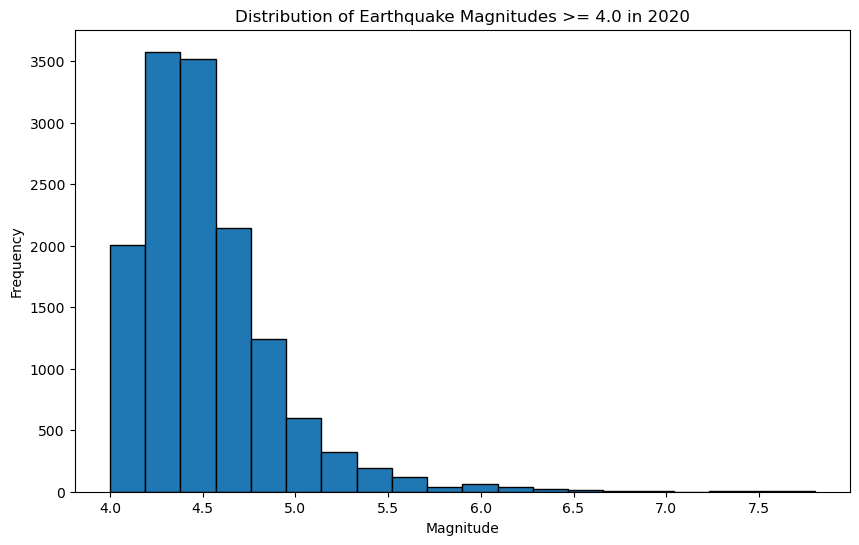

In [12]:
fig, axs = plt.subplots(figsize = (10,6))
axs.hist(earthquake_data_filtered['mag'], bins = 20, edgecolor = 'black')
axs.set_title("Distribution of Earthquake Magnitudes >= 4.0 in 2020")
axs.set_xlabel('Magnitude')
axs.set_ylabel('Frequency')
plt.show()

Next, I want to see how the earthquakes are spatially located across the earth.

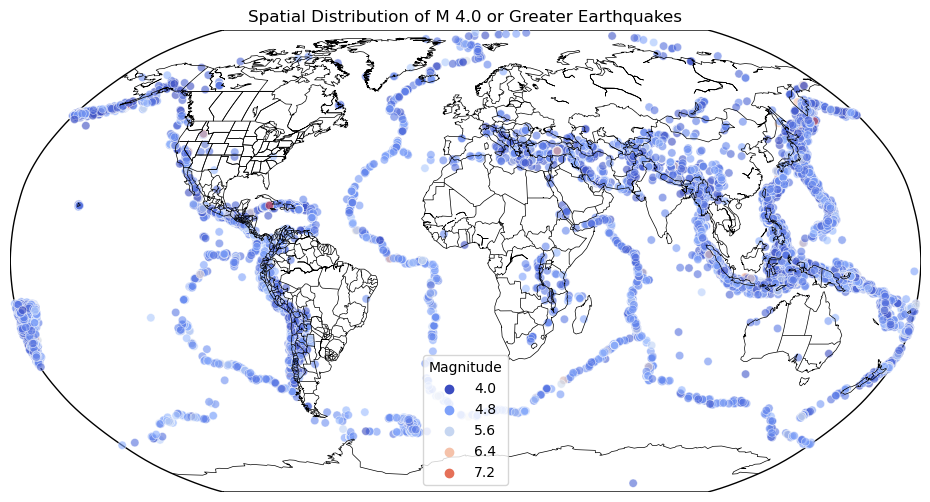

In [13]:
fig = plt.figure(figsize=(12, 6))

# Add basemap with Robinson projection
m = Basemap(projection='robin', lon_0=0, resolution='c')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawstates(linewidth=0.5)

# Reproject earthquake Lat Long to Robinson
x, y = m(earthquake_data_filtered['longitude'].values, earthquake_data_filtered['latitude'].values)

# Scatterplot with basemap in background
sns.scatterplot(x=x, y=y, data=earthquake_data_filtered, hue='mag', palette='coolwarm', alpha=0.6)
plt.title("Spatial Distribution of M 4.0 or Greater Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Magnitude')
plt.show()


The last visualization is a bit busy, so now I want to show just where the really large (>= M 6.0) happened. 

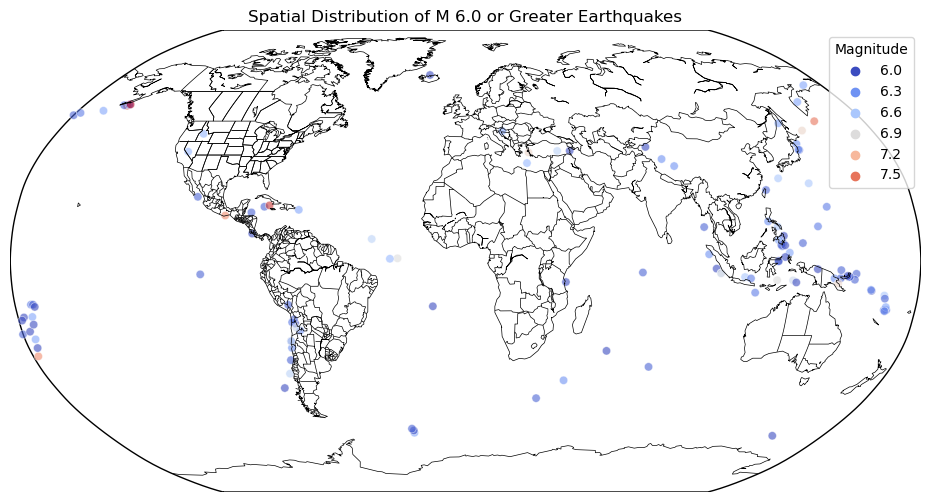

In [15]:
earthquake_data_large = earthquake_data[earthquake_data['mag'] >= 6.0]

fig = plt.figure(figsize=(12, 6))

# Add basemap with Robinson projection
m = Basemap(projection='robin', lon_0=0, resolution='c')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.drawstates(linewidth=0.5)

# Reproject earthquake Lat Long to Robinson
x, y = m(earthquake_data_large['longitude'].values, earthquake_data_large['latitude'].values)

# Scatterplot with basemap in background
sns.scatterplot(x=x, y=y, data=earthquake_data_large, hue='mag', palette='coolwarm', alpha=0.6)
plt.title("Spatial Distribution of M 6.0 or Greater Earthquakes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Magnitude')
plt.show()